In [1]:
from UTILITY_quickstart import *

In [2]:
#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-14_twoBunch.yml")
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch.yml")

In [3]:
csrTF = True

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e5,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0


In [4]:
eleNameList = tao.lat_ele_list()

#list(enumerate(eleNameList))
startIndex = 728
endIndex = 1294

selectIndices = np.arange(startIndex, endIndex, 1)

print(eleNameList[startIndex])
print(eleNameList[endIndex])

#eleNameList = eleNameList[startIndex:endIndex]

BEGL3F_1
BEGBC20


Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = CB1LE
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.4227766558659285 GeV
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = CB1LE
Set track_end = BEGBC20
Tracking!
Also setting BC20 energy = 10.0 GeV, from 9.91548891008253 GeV
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = CB1LE
Tracking!
trackBeam() exiting


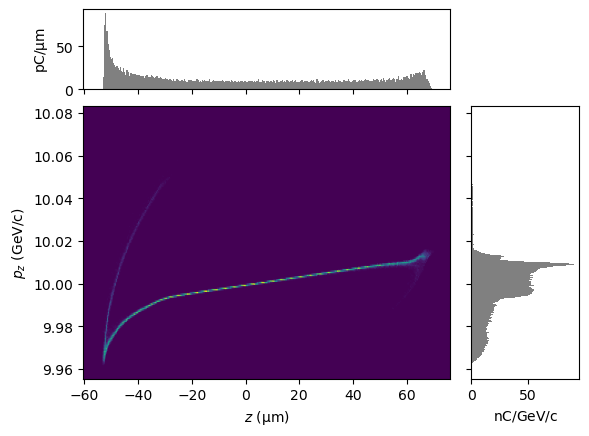

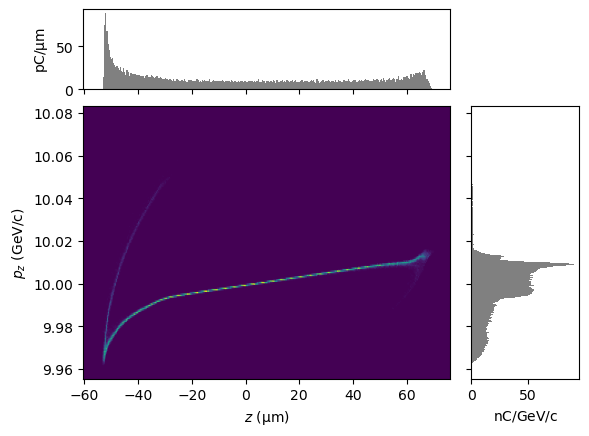

In [5]:
#Save beam data everywhere
#[tao.cmd(f"set beam add_saved_at = {ele}") for ele in eleNameList]
[tao.cmd(f"set beam add_saved_at = {i}") for i in selectIndices]

activeSettings = importedDefaultSettings | {"L2PhaseSet" : -33}

#Track
setLattice(tao, **activeSettings)
trackBeam(tao, **activeSettings, trackEnd = "CB1LE", verbose = True)

P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))


In [6]:
# for ele in eleNameList:
#     P = getBeamAtElement(tao, ele)
#     writeBeam(
#     P,
#     f"""/tmp/{ele}_{tao.ele_orbit(ele)['s']}.h5"""
#     )

for i in selectIndices:
    P = getBeamAtElement(tao, i)
    writeBeam(
    P,
    f"""/tmp/{tao.ele_orbit(i)['s']}.h5"""
    )